# Second Assignment
Author: Víctor Lavado Campos

## 1. Generate random data

### a)

Set the number of observations and its proportion

In [3]:

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 1000
p = 20

alpha_1 = np.random.uniform(low=0.2, high=0.3, size=None)
alpha_2 = np.random.uniform(low=0.2, high=0.3, size=None)

n1 = round(alpha_1*n)
n2 = round(alpha_2*n)
n3 = n - (n1 + n2)

### b)

Generate random vectors and constants

In [4]:
# Two random vector from a standard normal distribution
u1_vector = np.random.normal(loc=0.0, scale=1.0, size=p)
u2_vector = np.random.normal(loc=0.0, scale=1.0, size=p)

# Unit norm vector
u1 = u1_vector/(np.linalg.norm(u1_vector, ord=None, axis=None, keepdims=False))
u2 = u2_vector/(np.linalg.norm(u2_vector, ord=None, axis=None, keepdims=False))

# Generate constants
gamma_1 = 5
gamma_2 = 4


In [5]:
# Check that u1 and u2 are unit norm vectors
print("The norm of u1 is {}".format(np.linalg.norm(u1, ord=None, axis=None, keepdims=False)))
print("The norm of u2 is {}".format(np.linalg.norm(u2, ord=None, axis=None, keepdims=False)))

The norm of u1 is 0.9999999999999999
The norm of u2 is 1.0


### c)

Generate random diagonal matrices with values from uniform distribution

In [6]:
# Generate random diagonal matrixes 
diag_1 = np.random.uniform(low=0.25, high=4, size=20)
D1 = np.diag(diag_1)

diag_2 = np.random.uniform(low=0.25, high=4, size=20)
D2 = np.diag(diag_2)

In [7]:
# Check dimensions of the matrixes
print(D1.shape)
print(D2.shape)

(20, 20)
(20, 20)


### d)

Generate $X_{1}$ and $X_{2}$ matrices from multivariate normal distribution observations.

In [8]:
# Generate X1 and X2 matrices

# Define means and covariances matrixes for i=1,2
mean1 = u1*gamma_1
cov1 = D1
mean2 = u2*gamma_2
cov1 = D2

n1_obs = np.random.multivariate_normal(mean1, cov1, size=(n1))
X1 = n1_obs

n2_obs = np.random.multivariate_normal(mean1, cov1, size=(n2))
X2 = n2_obs

#Check dimensions of X1 and X2 matrixes

print("The number of variables for each observation is {}".format(p))

print("The number of observations for the first group is {}".format(n1))
print("The number of rows for matrix X1 is {}".format(X1.shape[0]))
print("The number of columns for matrix X1 is {}".format(X1.shape[1]))

print("The number of observations for the second group is {}".format(n2))
print("The number of rows for matrix X2 is {}".format(X2.shape[0]))
print("The number of columns for X2 maxtris is {}".format(X2.shape[1]))

The number of variables for each observation is 20
The number of observations for the first group is 274
The number of rows for matrix X1 is 274
The number of columns for matrix X1 is 20
The number of observations for the second group is 259
The number of rows for matrix X2 is 259
The number of columns for X2 maxtris is 20


Generate $Y_{1}$ and $Y_{2}$ as vectors of ones

In [9]:
# Generate Y1 and Y2 matrices

Y1 = np.ones(n1)
Y2 = np.ones(n2)

### e)

Generate $X_{3}$ matrix from multivariate normal distribution observations.

In [10]:
# Generate X3 matrix

# Define mean and covariances matrixe for i=3

mean3 = np.zeros(shape=(p))
cov3 =  np.identity(p)

n3_obs = np.random.multivariate_normal(mean3, cov3, size=(n3))
X3 = n3_obs

#Check dimensions of X3 matrix

print("The number of variables for each observation is {}".format(p))

print("The number of observations for the third group is {}".format(n3))
print("The number of rows for matrix X3 is {}".format(X3.shape[0]))
print("The number of columns for matrix X3 is {}".format(X3.shape[1]))

The number of variables for each observation is 20
The number of observations for the third group is 467
The number of rows for matrix X3 is 467
The number of columns for matrix X3 is 20


Generate $Y_{3}$ as a vector of zeros

In [11]:
# Generate Y3 Matrix

Y3 =np.zeros(n3)

### f)

Obtain $X$ and $Y$ matrices

In [12]:
#Generate X and Y matrices

X_aux = np.concatenate((X1,X2,X3), axis=0)
Xones = np.ones(n).T

X = np.concatenate((Xones[:,None], X_aux), axis=1)
Y = np.concatenate((Y1.T, Y2.T, Y3.T), axis=0)

#Check the dimensions of X and Y

print("The dimensions of X matrix are {}".format(X.shape))
print("The dimensions of Y matrix are {}".format(Y.shape))

The dimensions of X matrix are (1000, 21)
The dimensions of Y matrix are (1000,)


### g)

Plot the data using $u_{1}$ as one of the axis. PCA (Principal Component Analysis) has been applied to reduce the dimensionality from $p=20$ to $p=2$ just in this section to ease the graphical representation

In [13]:
# Plot the data

from sklearn.decomposition import PCA

print(u1[:,None].T.shape)
print(X_aux.shape)
# Concatenate u1 with X_aux (same as X with out the column of ones)
Mat_x = np.concatenate((u1[:,None].T, X_aux),axis=0)
print(Mat_x.shape)

# Reduce from p dimensions to 2 dimensions by performing PCA 

pca = PCA(n_components=2)
X_plot = pca.fit_transform(Mat_x)

#The first axis is obtained by performing PCA on u1

Ax1 = X_plot[0,:]

# The second axis is obtained manually, by making sure it is perpendicular to Ax1

Ax2 = np.array([Ax1[1],-Ax1[0]])

(1, 20)
(1000, 20)
(1001, 20)


In [14]:
# Check they are perpendicualar by doing dot product
# The output should be zero

np.dot(Ax1, Ax2, out=None)

0.0

In [14]:
# The first row of X_plot is not really an observation but u1
# Let's get rid of it

X_plot = np.delete(X_plot, 0, 0)

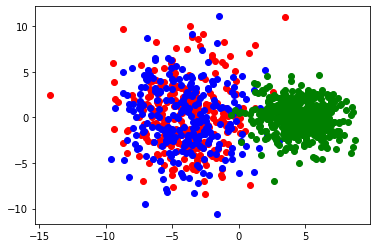

In [15]:
# Obtain the coordinates of the observations after transformed by PCA

# X coords are the dot products of the observation with Ax1
X_coord = np.array([])
# Y coords are the dot products of the observation with Ax2
Y_coord = np.array([])

for i in range(0, X_plot.shape[0]):
    X_values = np.dot(Ax1, X_plot[i,:]).tolist()
    Y_values = np.dot(Ax2, X_plot[i,:]).tolist()
    X_coord = np.append(X_coord,X_values)
    Y_coord = np.append(Y_coord,Y_values)
    
# Separate the coordinates accoding to the three samples
X1_cord = X_coord[0:n1]
X2_cord = X_coord[n1+1:n1+n2]
X3_cord = X_coord[n1+n2+1:n]

Y1_cord = Y_coord[0:n1]
Y2_cord = Y_coord[n1+1:n1+n2]
Y3_cord = Y_coord[n1+n2+1:n]

#plot the data

plt.plot(X1_cord, Y1_cord, 'ro')
plt.plot(X2_cord, Y2_cord, 'bo')
plt.plot(X3_cord, Y3_cord, 'go')

The observations of the third group (in green) are clearly separated from the rest.
The observations of the first group (in red) and the observations of the second group (in blue) are more overlaped. However, it is possible to appreciate the differences of the first and second group due to the different means and variance-covariance matrixes used to generate the observations.

### h)

Distribute the observations into training and testing partitions according to their indexes.

In [16]:
# Split the observations into training and testing set
# 80% training and 20% testing by selecting the index randomly
import random as rd

# Generate the random index list for testing
Is = rd.sample(range(0,1000), k = int(0.2*n))

# Generate the index list for training
It =[]

for i in range(0,1000):
    if i in Is:
        pass
    else: 
        It.append(i)

# Insert the observations into Xs, Ys, Xt and Yt according to the index

Xs = np.empty((0,p+1))
Ys = np.empty((0,1))
Xt = np.empty((0,p+1))
Yt = np.empty((0,1))

for i in range(0,1000):
    if i in Is:
        Xs = np.vstack((Xs,X[i]))
        Ys = np.vstack((Ys,Y[i]))
    else:
        Xt = np.vstack((Xt,X[i]))
        Yt = np.vstack((Yt,Y[i]))

To check that training and testing split has been done correctly, the dimensions of the matrices will be printed.<br>
**Xs**: should have 20% of the observations (as rows) and p+1 variables (as columns)<br>
**Ys**: should have 20% of the responses (as rows) and 1 column<br>
**Xt**: should have 80% of the observations (as rows) and p+1 variables (as columns)<br>
**Yt**: should have 80% of the responses (as rows) and 1 column

In [17]:
# Check the dimensions of Xs, Ys, Xt and Xt matrixes.
print("In Xs the number of rows is {} and columns is {}".format(Xs.shape[0],Xs.shape[1]))
print("In Ys the number of rows is {}".format(Ys.shape[0]))
print("In Xt the number of rows is {} and columns is {}".format(Xt.shape[0],Xt.shape[1]))
print("In Yt the number of rows is {}".format(Yt.shape[0]))


In Xs the number of rows is 200 and columns is 21
In Ys the number of rows is 200
In Xt the number of rows is 800 and columns is 21
In Yt the number of rows is 800


## 2. Least-squares with Scipy.optimize

For this section least squares criterion is implement as the objective function. Then *scipi.optimize* library is called through *minimize* module to optimize the objective function by finding the minimum least square error.

In [99]:
# Import libraries
from scipy.optimize import minimize
import math

In [100]:
# Define the objective function as the sum of squares of the errors

def least_sq(beta, X, Y):
    error = np.empty((0, p+1))
    for i in range (0,X.shape[0]):
        exp = np.exp(-beta*X[i])
        value = (Y[i]-1/(1+exp))**2
        error = np.append(error, np.array([value]),axis=0)
    error = np.sum(error)
    return error

# Initialize the values of beta
beta0 = np.zeros(p+1)

# Minimize the objective function using "Nelder-Mead"
# Arguments are from the training partition
result = minimize(least_sq, beta0, args=(Xt, Yt), method='Nelder-Mead', options={'disp': True,'xtol': 1e-10})

## Print results

print('\nValues of the least squares coefficients obtained with Nelder-Mead:')
for i in range(p+1):
    print('beta %3d %7.3f' %(i,result.x[i]))




Values of the least squares coefficients obtained with Nelder-Mead:
beta   0   0.263
beta   1  -0.515
beta   2   0.348
beta   3  -0.764
beta   4   0.124
beta   5  -0.611
beta   6  -0.049
beta   7  -0.224
beta   8  -0.350
beta   9   0.134
beta  10  -0.617
beta  11   0.518
beta  12   0.201
beta  13  -0.361
beta  14   0.470
beta  15   0.293
beta  16   0.827
beta  17  -0.112
beta  18  -0.070
beta  19  -0.494
beta  20   0.263


The *minimize* function documentations allows a number of solvers to be used. In this case *Melder-Mead* is applied because it is a free-derivative method, and therefore more straight forward. On top of that, the statement of the section does not ask specifically por any particular method.

Regarding the results obtained, an important finding is that beta0 (sometimes called intercept) and the rest of the betas (sometimes called slopes), they almost have all the values concentrated in beteween -1 and 1<br>

The main difficulty I found in my case was to deal with the definition of the function *least_sq*. At first I tried to implement the function using just *numpy* library, but that proved to be too complex because the outputs of the intermediate operations was not clear.<br>

To solve the issue, I applied an element wise approach using loops and then aggregating the results.

## 3. Least-squares with Bounds on the Variables

In section 3 the goal is to minimize the least squares objective function by imposing bounds on the $\beta$ parameters.

For that purpose, firstly, the objective function of section 2 is designed. Secondly, the gradient of the objective function is computed. 
As there are $p+1$ $\beta$ parameters to be estimated, the output of the gradient should be a $p+1$ dimensional vector.

In [43]:
# Import some libraries
import time
import scipy.optimize

In [101]:
# The objective function is the same

def least_sq(beta, X, Y):
    error = np.empty((0, p+1))
    for i in range (0,X.shape[0]):
        exp = np.exp(-beta*X[i])
        value = (Y[i]-1/(1+exp))**2
        error = np.append(error, np.array([value]),axis=0)
    error = np.sum(error)
    return error

# Initialize the values of beta
beta0 = np.zeros(p+1)

# Define the gradient (jacobian) of the objective function
def grad_least_sq(beta, X, Y):
    beta = np.array(beta)
    beta = beta.flatten()
    gg = np.empty((X.shape[0],beta.shape[0]))
    for i in range(0, X.shape[0]):
        for j in range(0, beta.shape[0]):
            comp = -2*(X[i,j]*math.exp(-beta[j]*X[i,j])*(Y[i]-1/(1+math.exp(-beta[j]*X[i,j]))))/(1+math.exp(-beta[j]*X[i,j]))**2
            gg[i,j] = comp
    gg = np.sum(gg, axis=0)
    return gg

In [102]:
# Check that the derivative routine for the objective function is computing correct values

## Initial values for  beta, u and delta

beta_0 = np.ones(p+1)
delta_v = 1.0e-4
u = np.random.normal(0,1,size=p+1)
u = u/np.linalg.norm(u,ord=2)

## Values of the objective function at  alpha  and  alpha + delta*u

beta_1 = beta_0 + delta_v*u

v1 = least_sq(beta_1,X,Y)
v0 = least_sq(beta_0,X,Y)

## Compute the gradient at  alpha

grad_0 = grad_least_sq(beta_0,X,Y)

## Compare the value of the directional derivative  g'u  with the 
## finite difference approximation  (f_1 - f_0)/delta

fd_appr = (v1 - v0)/delta_v
dir_der = np.dot(grad_0.T,u)
print('Finite difference approx: %12.6f' %fd_appr)
print('Directional derivative:   %12.6f' %dir_der)


Finite difference approx:    30.369359
Directional derivative:      30.370916


Both metods output similar values, therefore the derivative routine for the objective function is consistent

Three algorithms will be applied to compute the optimization model: **SLSQP, TNC, Melder-Mead**

In [103]:
# Let's implement two different procedures with bounds on the variables

# The result from the previous section showed that betas were in between almost in [-1, 1] interval, 
# so that interval will be considered as the bounds

lower = -np.ones(p+1)
upper = np.ones(p+1)

# Define bounds

bnds = Bounds(lower, upper)

# Initialize the values of beta

beta0 = np.zeros(p+1)

# First procedure SLSQP

time_start1 = time.process_time()
result1 = minimize(least_sq,beta0,args=(Xt,Yt),method='SLSQP',jac=grad_least_sq,bounds=bnds,options={'disp': True})
time_elapsed1 = (time.process_time() - time_start1) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed1))

# Print the output 

print(result1)

## Print the estimated beta coefficients

print('\nValues of the least squares coefficients obtained with SLSQP:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result1.x[i]))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3729.2963371874184
            Iterations: 30
            Function evaluations: 69
            Gradient evaluations: 30
Running time = 10.63653
     fun: 3729.2963371874184
     jac: array([-2.56922940e-05,  2.63790540e-04,  3.22842347e-04,  2.85509760e-04,
       -1.01117063e-03,  2.46823477e-04,  1.15171343e-03,  1.25905054e-04,
       -4.94703798e-05, -5.96256509e-04,  4.18880749e-04,  6.62297860e-04,
       -3.63111890e-04, -2.30356206e-04, -1.15797101e-03, -5.67107718e-04,
       -6.03374725e-04, -1.20447425e-03, -4.42561754e-05,  1.46487975e-03,
       -1.05991149e-03])
 message: 'Optimization terminated successfully.'
    nfev: 69
     nit: 30
    njev: 30
  status: 0
 success: True
       x: array([ 0.09507129, -0.80120946,  0.58499143, -0.9493628 ,  0.26586757,
       -0.78764014, -0.14701094, -0.08257897, -0.30590452, -0.13888823,
       -0.71510712,  0.57256934,  0.06820257, -0.7990773

In [104]:
# Second procedure using TNC

time_start2 = time.process_time()
result2 = minimize(least_sq,beta0,args=(Xt,Yt),method='TNC',jac=grad_least_sq,bounds=bnds,options={'disp': True})
time_elapsed2 = (time.process_time() - time_start2) 

#Print the running time

print('Elapsed time = %8.5f' %(time_elapsed2))

# Print the output

print(result2)

# Print the estimated beta coefficients

print('\nValues of the least squares coefficients obtained with TNC:')
for i in range(p+1):
    print('beta %3d %7.3f' %(i,result2.x[i]))

Elapsed time = 13.73651
     fun: 3729.2963371493815
     jac: array([-2.08748161e-05,  8.86030036e-06, -2.29002445e-06, -1.46363193e-05,
       -7.52247409e-05,  2.92006631e-05,  3.32865867e-06, -8.51617287e-05,
        2.31149704e-05, -8.79403513e-07, -1.93424513e-06,  6.15852156e-05,
       -7.79745103e-05, -7.61645944e-05, -2.49399513e-05, -1.63220840e-05,
       -1.48209053e-05,  3.91507688e-05,  7.90369160e-06, -1.82031076e-04,
       -3.31461059e-05])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 42
     nit: 10
  status: 1
 success: True
       x: array([ 0.09507134, -0.80121384,  0.58498806, -0.94936914,  0.2658734 ,
       -0.78764312, -0.147024  , -0.08258008, -0.30590415, -0.13888517,
       -0.71511221,  0.57256367,  0.06820415, -0.79907529,  0.25594653,
        0.37095182,  0.79823729,  0.19110582, -0.55641532, -0.24375744,
        0.26392906])

Values of the least squares coefficients obtained with TNC:
beta   0   0.095
beta   1  -0.801
beta   2   0.585
beta   3  

In [105]:
# Third procedure using Nelder Mead as in the previous section
# This method does not allow to input bounds, but it is interesting for comparing the outputs

time_start3 = time.process_time()
result3 = minimize(least_sq,beta0,args=(Xt,Yt),method='Nelder-Mead',options={'disp': True})
time_elapsed3 = (time.process_time() - time_start3) 

#Print the running time

print('Elapsed time = %8.5f' %(time_elapsed3))

# Print the output

print(result3)

# Print the estimated beta coefficients

print('\nValues of the least squares coefficients obtained with Melder-Mead:')
for i in range(p+1):
    print('beta %3d %7.3f' %(i,result3.x[i]))

Elapsed time = 122.52428
 final_simplex: (array([[ 0.26342056, -0.51476689,  0.34795249, -0.76430795,  0.12397376,
        -0.61059554, -0.04940258, -0.22365583, -0.34970187,  0.1335899 ,
        -0.616851  ,  0.51804681,  0.20077316, -0.361297  ,  0.47040944,
         0.29253097,  0.82673951, -0.11249968, -0.07037682, -0.49368342,
         0.26305985],
       [ 0.26752444, -0.52511327,  0.35574236, -0.75446137,  0.1095816 ,
        -0.6086754 , -0.04442195, -0.22282422, -0.34102885,  0.1296371 ,
        -0.62406911,  0.5201696 ,  0.20814228, -0.36747037,  0.47047725,
         0.29790366,  0.82825957, -0.10374235, -0.06949744, -0.51461702,
         0.26263058],
       [ 0.26561254, -0.52597768,  0.35869407, -0.75914894,  0.11681438,
        -0.61480226, -0.04184431, -0.22419542, -0.35266994,  0.13103484,
        -0.62895735,  0.52223741,  0.20616338, -0.36815327,  0.47576273,
         0.29802764,  0.83519287, -0.10699344, -0.06737723, -0.51450486,
         0.26460784],
       [ 0.26647

Below there is table summarizing the results obtained for each of the three algorithm **SLSQP, TNC and Melder-Mead**

|Method |Running time (s)|Number of iterations|Number of evaluations|OF Value|Bounds|
|---|---|---|---|---|---|
|**SLSQP** |	10.63 |	30 |	69 |	3729.29 |	Yes|
|**TNC**	|13.73	|	10 |	42|	3729.29|	Yes|
|**Nelder Mead**	|122.52	|	3460|	4200|	3793.68 |	No |

**Note: the results depend on the randomness introduced when generaring the data, so they values will change if the code is executed again**

The running time of Nelder Mead is very large compared to SLSQP and TNC, it might be because the the two last ones use the gradient for computing the least squares function as opossed to Melder Mead. In the same line, Melder Mead requires a lot more of iterations, in fact the function stopped after reaching the maximum number of iterations allowed, because it was not able to converge before.

Now regarding the values obtained for the beta coefficients, they all are within the [-1,1].

Probably the reason why the beta coefficients are contained so well in the interval has to do with the artificial data set generated that follows a multivariate gaussian distribution. In the case of data from the real world, the coefficients would probably have a bigger variance.

It is also very interesing to notice that $\beta$ estimations performed with SLSQP and TNC are very similar.

## 4 Classification of Observations in the Test Partition

Let's first obtain the approximations of $y_{i}$ for the beta coefficients estimated by each of the three methods.

In [106]:
# Array of betas obtained by SLSQP
beta_s = np.empty(0)

# Array of betas obtained by TNC
beta_t = np.empty(0)

# Array of betas obtained by Melder-Mead
beta_m = np.empty(0)

for i in range(p+1):
    beta_s = np.append(beta_s,result1.x[i])
    beta_t = np.append(beta_t,result2.x[i])
    beta_m = np.append(beta_m,result3.x[i])

In [107]:
print("Array of beta of SLSQP {}".format(beta_s))
print("Array of beta of TNC {}".format(beta_t))
print("Array of beta of Melder-Mead {}".format(beta_m))

Array of beta of SLSQP [ 0.09507129 -0.80120946  0.58499143 -0.9493628   0.26586757 -0.78764014
 -0.14701094 -0.08257897 -0.30590452 -0.13888823 -0.71510712  0.57256934
  0.06820257 -0.79907733  0.25594041  0.37094843  0.79823014  0.19109672
 -0.55641593 -0.2437502   0.26392278]
Array of beta of TNC [ 0.09507134 -0.80121384  0.58498806 -0.94936914  0.2658734  -0.78764312
 -0.147024   -0.08258008 -0.30590415 -0.13888517 -0.71511221  0.57256367
  0.06820415 -0.79907529  0.25594653  0.37095182  0.79823729  0.19110582
 -0.55641532 -0.24375744  0.26392906]
Array of beta of Melder-Mead [ 0.26342056 -0.51476689  0.34795249 -0.76430795  0.12397376 -0.61059554
 -0.04940258 -0.22365583 -0.34970187  0.1335899  -0.616851    0.51804681
  0.20077316 -0.361297    0.47040944  0.29253097  0.82673951 -0.11249968
 -0.07037682 -0.49368342  0.26305985]


In [108]:
# Define empty arrays to store the values

# Empty array of estimated respones obtained by SLSQP
Y_s = np.empty(0)
# Empyt array of estimated respones obtained by TNC
Y_t = np.empty(0)
# Empty array of estimated respones obtained by Nelder-Mead
Y_m = np.empty(0)

# Array of estimated responses obtained by SLSQP in the testing partition
Y_s = np.append(Y_s,1/(1+np.exp(-np.dot(Xs,beta_s.T))))
# Array of estimated responses obtained by TNC in the testing partition
Y_t = np.append(Y_t,1/(1+np.exp(-np.dot(Xs,beta_t.T))))
# Array of estimated responses obtained by Nelder Mead in the testing partition
Y_m = np.append(Y_m,1/(1+np.exp(-np.dot(Xs,beta_m.T))))

Section 4 defines an observation classified incorrectly when one of the following conditions is met:
* $ŷ_{i} ≥$ $0.5$ $and$ $y_{i} = 0$
* $ŷ_{i} <$ $0.5$ $and$ $y_{i} = 1$

In order to speed the computational time a bit, a unique condition will be applied in the cell below to detect whether an observation is classified incorrectly 
* $|ŷ_{i}-y_{i}| ≥ 0.5$

In [109]:
Error_s = np.empty(0)
Error_t = np.empty(0)
Error_m = np.empty(0)

# The observations classified incorrectly will be those which its predicted difference 
for i in range(0,len(Is)):
    dif_s = abs(Ys[i]-Y_s[i])
    if dif_s>=0.5:
        Error_s = np.append(Error_s,1)
    else:
        Error_s = np.append(Error_s,0)
    dif_t = abs(Ys[i]-Y_t[i])
    if dif_t>=0.5:
        Error_t = np.append(Error_t,1)
    else:
        Error_t = np.append(Error_t,0)    
    dif_m = abs(Ys[i]-Y_m[i])
    if dif_m>=0.5:
        Error_m = np.append(Error_m,1)
    else:
        Error_m = np.append(Error_m,0)
        
print('The proportion of incorrectly classified observation with SLSQP is {}'.format((np.sum(Error_s))/len(Is)))
print('The proportion of incorrectly classified observation with TNC is {}'.format((np.sum(Error_t))/len(Is)))
print('The proportion of incorrectly classified observation with Melder-Mead is {}'.format((np.sum(Error_m))/len(Is)))


The proportion of incorrectly classified observation with SLSQP is 0.205
The proportion of incorrectly classified observation with TNC is 0.205
The proportion of incorrectly classified observation with Melder-Mead is 0.25


## 5 Estimation using Maximum Likelihood

In section 5 the goal is to estimate $\beta$ as the coefficients that maximize the logarithm of the likelihood function. 
The process to estimate $\beta$ is analogous to that of section 3: first code the function, and then its gradient. Once that step is completed, *scipy.optimize* library is called to maximize the likelihood by finding $\beta$ parameters

In [113]:
# The objective function is now defined according to maximum likelihood criterion
def max_li(beta, X, Y):
    output = np.empty((0, p+1))
    for i in range(0, X.shape[0]):
        exp = np.exp(-beta*X[i])
        sumh1 = Y[i]*np.log(1/(1+exp))
        sumh2 = (1-Y[i])*np.log(1-(1/(1+exp)))
        # Change the sign of the expression to maximize when calling scipy.optimize.minimize
        li = -(sumh1 + sumh2) 
        output = np.append(output,np.array([li]),axis=0)
    output = np.sum(output)
    return output

# Initialize the values of beta to call minimize
beta0 = np.zeros(p+1)

# Define the gradient (jacobian) of the objective function
def grad_max_li(beta, X, Y):
    gg = np.empty((0,p+1))
    for i in range(0, X.shape[0]):
        exp = np.exp(beta*X[i])
        num = X[i]*((Y[i] - 1)*exp + Y[i])
        den = exp + 1
        comp = -(num/den)
        gg = np.append(gg, np.array([comp]), axis=0)
    gg = np.sum(gg, axis=0)
    return gg
        

In [114]:
# Check that the derivative routine for the objective function is computing correct values

## Initial values for  beta, u and delta

beta_0 = np.ones(p+1)
delta_v = 1.0e-4
u = np.random.normal(0,1,size=p+1)
u = u/np.linalg.norm(u,ord=2)

## Values of the objective function at  alpha  and  alpha + delta*u

beta_1 = beta_0 + delta_v*u

v1 = max_li(beta_1,X,Y)
v0 = max_li(beta_0,X,Y)

## Compute the gradient at  alpha

grad_0 = grad_max_li(beta_0,X,Y)

## Compare the value of the directional derivative  g'u  with the 
## finite difference approximation  (f_1 - f_0)/delta

fd_appr = (v1 - v0)/delta_v
dir_der = np.dot(grad_0.T,u)
print('Finite difference approx: %12.6f' %fd_appr)
print('Directional derivative:   %12.6f' %dir_der)


Finite difference approx:  -896.626975
Directional derivative:    -896.636686


The values obtained with finite difference approx and directional derivative are very similar. Therefore the derivative routine to generate the gradient is considered to be consistent

Now let's consider several methods to estimate $\beta$ parameters in order to maximize the logarithm of the likelihood function. In this ocassion it is important to notice that the sign of the expression was changed before because *scipy.optimize* can only minimize. But now we actually want to maximize. The algorithms that will be applied are **CG (Conjugate Gradient), L-BFGS-B and Newton-CG"**

In [115]:
# First method CG

time_start1 = time.process_time()
result1 = minimize(max_li,beta0,args=(Xt,Yt),method='CG',jac=grad_max_li,options={'disp': True})
time_elapsed1 = (time.process_time() - time_start1) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed1))

# Print the output 

print(result1)

## Print the estimated beta coefficients

print('\nValues of the beta coefficients obtained with CG:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result1.x[i]))

/home/vickytron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/vickytron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Optimization terminated successfully.
         Current function value: 10560.997909
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28
Running time =  2.10673
     fun: 10560.997909033733
     jac: array([-2.06875007e-07,  1.03824439e-07,  5.94639371e-08, -5.33697334e-07,
       -3.27510039e-07,  2.15609844e-06, -3.83442492e-06,  1.16486659e-06,
        1.23289421e-06,  1.98678045e-06,  3.19783485e-07, -1.20219245e-07,
       -1.99932091e-07, -5.00755130e-07, -5.88309885e-07,  1.38534001e-07,
        1.04520030e-06, -1.27143438e-06, -6.38834809e-07,  1.97364565e-06,
        1.39075116e-06])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 13
    njev: 28
  status: 0
 success: True
       x: array([ 0.09507154, -0.79068133,  0.61773011, -1.02793307,  0.27305402,
       -0.87925146, -0.14546646, -0.08309907, -0.32637294, -0.14137104,
       -0.7902052 ,  0.60798285,  0.06778329, -0.86772932,  0.26399682,
        0.38683362,

In [116]:
# Second method L-BFGS-B

time_start2 = time.process_time()
result2 = minimize(max_li,beta0,args=(Xt,Yt),method='L-BFGS-B',jac=grad_max_li,options={'disp': True})
time_elapsed2 = (time.process_time() - time_start2) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed2))

# Print the output 

print(result2)

## Print the estimated beta coefficients

print('\nValues of the beta coefficients obtained with L-BFGS-B:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result2.x[i]))

Running time =  0.75499
      fun: 10560.99791148206
 hess_inv: <21x21 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00016595,  0.00066187,  0.00112846,  0.0004197 ,  0.00130656,
        0.00140384,  0.00034056,  0.00655305, -0.03883184,  0.01215855,
        0.00046083, -0.00180406, -0.00314061,  0.00119106, -0.00380459,
       -0.01184473, -0.00088116, -0.00199299, -0.00017086,  0.00624321,
       -0.00697784])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 10
      nit: 9
   status: 0
  success: True
        x: array([ 0.09507071, -0.79067768,  0.61773498, -1.02793059,  0.2730579 ,
       -0.87924504, -0.14546457, -0.08308186, -0.32646793, -0.1413398 ,
       -0.7902031 ,  0.60797615,  0.06777479, -0.86772354,  0.26398721,
        0.3868021 ,  0.89833394,  0.19300138, -0.56631041, -0.25666767,
        0.26603849])

Values of the beta coefficients obtained with L-BFGS-B:
beta   0   0.095
beta   1  -0.791
beta   2   0.618
beta   3  -1.028
beta  

In [117]:
# Third method Newton CG

time_start3 = time.process_time()
result3 = minimize(max_li,beta0,args=(Xt,Yt),method='Newton-CG',jac=grad_max_li,options={'disp': True})
time_elapsed3 = (time.process_time() - time_start3) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed3))

# Print the output 

print(result3)

## Print the estimated beta coefficients

print('\nValues of the beta coefficients obtained with Newton CG:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result3.x[i]))

Optimization terminated successfully.
         Current function value: 10560.997909
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 48
         Hessian evaluations: 0
Running time =  2.04091
     fun: 10560.997909033737
     jac: array([ 1.51533027e-04, -6.61285730e-04,  1.18190385e-05,  6.40243346e-04,
       -8.74492946e-06, -5.03770617e-05, -2.88020373e-04, -4.28070029e-08,
       -6.11485340e-05, -3.03825530e-08, -4.98572241e-05, -1.06481557e-09,
       -4.53670221e-07, -2.26946189e-04,  3.11741335e-06,  1.65943839e-07,
        2.52555979e-06,  2.88347301e-07, -3.51397222e-04,  2.19854274e-05,
       -6.47850193e-06])
 message: 'Optimization terminated successfully.'
    nfev: 12
    nhev: 0
     nit: 11
    njev: 48
  status: 0
 success: True
       x: array([ 0.09507151, -0.79068132,  0.61773011, -1.02793296,  0.27305402,
       -0.87925146, -0.14546642, -0.08309907, -0.326373  , -0.14137105,
       -0.79020518,  0.60798285,  0.06778329, -

Below there is table summarizing the results obtained for each of the three methods **CG, L-BFGS-B and Newton-CG**

|Method |Running time (s)|Number of iterations|OF Evaluations|JAC Evaluations|OF Value|
|---|---|---|---|---|---|
|**CG** |	2.10 |	13 |	28 |	28 |	10560.99|
|**L-BFGS-B**	|0.75	|	9 |	10|	-|	10560.99|
|**Newton-CG**	|2.04	|	11|	12|	48|	10560.99|

**Note: the results depend on the randomness introduced when generaring the data, so the values will change if the code is executed again**

The running time three of three algorithms as a group is significantly quicker than for the case of least squares criterion. The fastest one is L-BFGS-B, but the output offers less information than CG and Newton CG. One example of this is the number of evaluations of the jacobian, which is not shown with L-BFGS-B.

The value of the objective function (OF) is almost the same for the three methods (just two decimals are displayed in the table). Furthermore, the value is quite high, which is something reasonable considering that the goal is to maximize the logarithm of the likelihood. 

Now regarding the values obtained for the $\beta$ parameters, they are all very closed to zero. This is due to the fact that *scipy.optimize* library maximizes the logarithm of the likelihood (because the sign was changed in advanced). The graph below show, how small values of $φ(β; x)$ make $-log(φ(β; x))$ grow close to zero. Therefore, small values of $\beta$ contribute to maximize $-log(φ(β; x))$ and in extension, the logarithm of the likelihood.

![alt text](Screen.png)

An important consequence of dealing with values close to zero, is the overflow warning triggered by CG algorithm, because the $-log(φ(β; x))$ term probably induces some numerical inestabilities in the model

## 6 Estimation with Regularization Term

Now the objective function and the gradient are modified by adding a regularization term to their expressions.

As a consequence the expression of the objective function and the gradient changes slightly by adding this regularization term. This term increases as the value of the parameters weights $(\beta)$ increase; keep in mind that with regularization we add a new hyperparameter, to control the regularization strength.

Regularization can be seen as a penalty against complexity. Increasing the regularization strength penalizes "large" weight coefficients. With the use of regularization our goal is to prevent that our model picks up "peculiarities," "noise," or "pattern" where there is none.

More information can be consulted in the following link: https://www.kdnuggets.com/2016/06/regularization-logistic-regression.html

In [118]:
# The objective function is defined according to maximum likelihood criterion with regularization term
def max_li2(beta, X, Y, rho):
    output = np.empty((0, p+1))
    nt = 0.8 * 1000
    for i in range(0, X.shape[0]):
        term = (rho/2)*((np.linalg.norm(beta,ord=2))**2)
        exp = np.exp(-beta*X[i])
        sumh1 = (Y[i]*np.log(1/(1+exp))) 
        sumh2 = (1-Y[i])*np.log(1-(1/(1+exp)))
        # Change the sign of the expression to maximize when calling scipy.optimize.minimize
        li = - (sumh1 + sumh2) 
        output = np.append(output,np.array([li]),axis=0)
    # Finally add the regularization term because sign was changed
    output = (1/nt)*np.sum(output)+term
    return output

# Initialize the values of beta to call minimize
beta0 = np.zeros(p+1)

# Define the gradient (jacobian) of the objective function
def grad_max_li2(beta, X, Y,rho):
    gg = np.empty((0,p+1))
    nt = 0.8 * 1000
    for i in range(0, X.shape[0]):
        term = rho * beta
        exp = np.exp(beta*X[i])
        num = X[i]*((Y[i] - 1)*exp + Y[i])
        den = exp + 1
        comp = -(num/den)
        gg = np.append(gg, np.array([comp]), axis=0)
    gg = (1/nt)*np.sum(gg, axis=0)+term
    return gg

In [119]:
# Check that the derivative routine for the objective function is computing correct values

## Initial values for  beta, u, delta and rho

beta_0 = np.ones(p+1)
delta_v = 1.0e-4
u = np.random.normal(0,1,size=p+1)
u = u/np.linalg.norm(u,ord=2)
rho = np.random.uniform(low=0.1, high=10, size=None)

## Values of the objective function at  beta  and  beta + delta*u

beta_1 = beta_0 + delta_v*u

v1 = max_li2(beta_1,Xt,Yt,rho)
v0 = max_li2(beta_0,Xt,Yt,rho)

## Compute the gradient at beta

grad_0 = grad_max_li2(beta_0,Xt,Yt,rho)

## Compare the value of the directional derivative  g'u  with the 
## finite difference approximation  (f_1 - f_0)/delta

fd_appr = (v1 - v0)/delta_v
dir_der = np.dot(grad_0.T,u)
print('Finite difference approx: %12.6f' %fd_appr)
print('Directional derivative:   %12.6f' %dir_der)

Finite difference approx:    -5.529979
Directional derivative:      -5.530374


The values obtained with finite difference approx and directional derivative are very similar. Therefore the derivative routine to generate the gradient is considered to be consistent

Now let's consider several methods to estimate $\beta$ parameters in order to maximize the logarithm of the likelihood function. In this ocassion it is important to notice that the sign of the expression was changed before because *scipy.optimize* can only minimize. But now we actually want to maximize. The algorithms that will be applied are **CG (Conjugate Gradient), L-BFGS-B and Newton-CG"** so the comparison with maximum likelihood is done using the same algorithms. There will be two values of $\rho$ to run each of the algorithms.

In [120]:
rho1 = np.random.uniform(low=0.1, high=10, size=None)
rho2 = np.random.uniform(low=0.1, high=10, size=None)
print(rho1)
print(rho2)

5.476145799571082
6.914192121869568


In [121]:
# First method CG with rho1

time_start1 = time.process_time()
result1 = minimize(max_li2,beta0,args=(Xt,Yt,rho1),jac=grad_max_li2,method='CG',options={'disp': True})
time_elapsed1 = (time.process_time() - time_start1) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed1))

# Print the output 

print(result1)

## Print the estimated beta coefficients

print('\nValues of the beta coefficients obtained with CG and rho1:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result1.x[i]))

Optimization terminated successfully.
         Current function value: 14.417046
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Running time =  0.80967
     fun: 14.417046130122307
     jac: array([-2.78835626e-07, -1.19729139e-07,  3.93188913e-07,  5.83571012e-08,
        2.04155819e-07,  2.81353722e-07,  5.10936322e-07, -6.25645344e-08,
        1.27465312e-07, -9.17720556e-08,  4.24653963e-07, -3.91310168e-08,
        5.32684191e-08, -1.25928833e-07,  1.32219480e-08, -1.54541306e-07,
        2.81915741e-07, -6.34723916e-09,  2.34085152e-07,  2.05699272e-07,
        1.60995463e-07])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 4
    njev: 9
  status: 0
 success: True
       x: array([ 0.00414759, -0.04264865,  0.03942946, -0.09319869,  0.02088595,
       -0.08777164, -0.00586625, -0.00669468, -0.03135859, -0.01178494,
       -0.06365367,  0.04880707,  0.00529632, -0.0620767 ,  0.02391046,
        0.03618221,  0.09116

In [122]:
# First method CG with rho2

time_start2 = time.process_time()
result2 = minimize(max_li2,beta0,args=(Xt,Yt,rho2),method='CG',jac=grad_max_li2,options={'disp': True})
time_elapsed2 = (time.process_time() - time_start2) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed2))

# Print the output 

print(result2)

## Print the estimated beta coefficients

print('\nValues of the beta coefficients obtained with CG and rho2:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result2.x[i]))

Optimization terminated successfully.
         Current function value: 14.442911
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Running time =  0.80721
     fun: 14.442911318518162
     jac: array([-1.24535461e-07, -4.97199707e-08,  1.74193893e-07,  3.01627334e-08,
        9.13405561e-08,  1.20885718e-07,  2.27722344e-07, -2.80716069e-08,
        5.59645492e-08, -4.14828144e-08,  1.94169361e-07, -1.62225871e-08,
        2.37861769e-08, -5.77964845e-08,  7.39383102e-09, -6.83015988e-08,
        1.32710237e-07, -4.27791867e-09,  1.08017773e-07,  9.40265243e-08,
        7.28237525e-08])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 4
    njev: 9
  status: 0
 success: True
       x: array([ 0.00331508, -0.03423497,  0.03171217, -0.07628203,  0.01682019,
       -0.07186107, -0.00468569, -0.00539302, -0.02538013, -0.00950059,
       -0.05159682,  0.03945672,  0.00426422, -0.05013985,  0.01932124,
        0.02928682,  0.07457

In [123]:
# Second method L-BFGS-B with rho1

time_start3 = time.process_time()
result3 = minimize(max_li2,beta0,args=(Xt,Yt,rho1),method='L-BFGS-B',jac=grad_max_li2,options={'disp': True})
time_elapsed3 = (time.process_time() - time_start3) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed3))

# Print the output 

print(result3)

## Print the estimated beta coefficients

print('\nValues of the beta coefficients obtained with L-BFGS-B and rho1:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result3.x[i]))

Running time =  0.53633
      fun: 14.417046130122317
 hess_inv: <21x21 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.66738051e-07, -1.18657518e-07,  2.06634744e-07,  2.25067814e-07,
        8.62048977e-08,  6.73041860e-07,  3.15256864e-07, -2.49163776e-08,
        2.10787960e-08, -3.03076858e-08, -9.71382527e-08, -3.97621399e-08,
        2.35618265e-08,  1.03127810e-08, -1.35964584e-08, -2.19542035e-08,
        7.33894281e-07,  1.35187777e-08,  8.19264298e-08, -1.29140194e-07,
        5.07640237e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 4
   status: 0
  success: True
        x: array([ 0.00414761, -0.04264865,  0.03942943, -0.09319866,  0.02088594,
       -0.08777158, -0.00586629, -0.00669467, -0.03135861, -0.01178493,
       -0.06365376,  0.04880707,  0.00529631, -0.06207668,  0.02391045,
        0.03618223,  0.09116798,  0.01180958, -0.03006676, -0.02782684,
        0.0216927 ])

Values of the beta coefficients obtain

In [124]:
# Second method L-BFGS-B with rho2

time_start4 = time.process_time()
result4 = minimize(max_li2,beta0,args=(Xt,Yt,rho2),method='L-BFGS-B',jac=grad_max_li2,options={'disp': True})
time_elapsed4 = (time.process_time() - time_start4) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed4))

# Print the output 

print(result4)

## Print the estimated beta coefficients

print('\nValues of the beta coefficients obtained with L-BFGS-B and rho2:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result4.x[i]))

Running time =  0.45790
      fun: 14.44291131853947
 hess_inv: <21x21 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.41521040e-06,  6.88928682e-06, -3.39322479e-08, -3.53107818e-07,
        1.37451168e-06, -2.66299867e-06,  5.65865620e-06, -5.10698802e-07,
       -2.37631358e-06, -1.13986664e-06, -1.60701159e-06,  4.90526511e-06,
        2.92386999e-07, -6.85736505e-06,  2.55662324e-06,  2.64555863e-06,
       -5.22875415e-06, -2.49351954e-06,  9.05164802e-06,  4.24934303e-07,
        2.16264783e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 5
      nit: 3
   status: 0
  success: True
        x: array([ 0.00331462, -0.03423402,  0.03171214, -0.07628208,  0.01682036,
       -0.07186142, -0.00468493, -0.00539309, -0.02538045, -0.00950073,
       -0.05159706,  0.03945738,  0.00426426, -0.05014076,  0.01932158,
        0.02928718,  0.0745708 ,  0.00947518, -0.02410524, -0.02258078,
        0.01749067])

Values of the beta coefficients obtaine

In [125]:
# Third method Newton CG and rho1

time_start5 = time.process_time()
result5 = minimize(max_li2,beta0,args=(Xt,Yt,rho1),method='Newton-CG',jac=grad_max_li2,options={'disp': True})
time_elapsed5 = (time.process_time() - time_start5) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed5))

# Print the output 

print(result5)

## Print the estimated beta coefficients

print('\nValues of the beta coefficients obtained with Newton CG and rho1:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result5.x[i]))

Optimization terminated successfully.
         Current function value: 14.417046
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 18
         Hessian evaluations: 0
Running time =  0.88503
     fun: 14.41704613012222
     jac: array([-1.16971635e-05,  5.00785928e-05, -2.74360522e-05, -4.13651563e-05,
       -9.45841693e-06, -4.40423544e-05,  1.84673883e-05,  2.72828341e-06,
        5.90669828e-07,  3.59425680e-06, -2.80832802e-07, -3.08263827e-06,
       -2.62218091e-06,  7.26046367e-06, -2.09039799e-06, -5.95318767e-07,
        2.96241430e-05, -1.54471302e-05,  4.64909235e-05, -1.31994621e-07,
       -6.22858085e-06])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 0
     nit: 4
    njev: 18
  status: 0
 success: True
       x: array([ 0.00414765, -0.04264864,  0.0394294 , -0.0931987 ,  0.02088592,
       -0.08777169, -0.00586633, -0.00669467, -0.03135861, -0.01178492,
       -0.06365374,  0.04880708,  0.00529631, -0.062076

In [126]:
# Third method Newton CG and rho2

time_start6 = time.process_time()
result6 = minimize(max_li2,beta0,args=(Xt,Yt,rho2),method='Newton-CG',jac=grad_max_li2,options={'disp': True})
time_elapsed6 = (time.process_time() - time_start6) 

#Print the running time

print('Running time = %8.5f' %(time_elapsed6))

# Print the output 

print(result6)

## Print the estimated beta coefficients

print('\nValues of the beta coefficients obtained with Newton CG and rho2:')
for i in range(p+1):
   print('beta %3d %7.3f' %(i,result6.x[i]))

Optimization terminated successfully.
         Current function value: 14.442911
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 18
         Hessian evaluations: 0
Running time =  0.88591
     fun: 14.44291131851815
     jac: array([-6.41677471e-06,  2.77071815e-05, -1.52917380e-05, -2.32331354e-05,
       -5.32410750e-06, -2.45277709e-05,  1.01202495e-05,  1.54091846e-06,
        3.97953913e-07,  2.04386706e-06, -1.01163121e-07, -1.83378052e-06,
       -1.47479267e-06,  4.19182282e-06, -1.24042076e-06, -4.05598342e-07,
        1.63947903e-05, -8.54704302e-06,  2.56543877e-05, -6.62425505e-08,
       -3.54290169e-06])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 0
     nit: 4
    njev: 18
  status: 0
 success: True
       x: array([ 0.0033151 , -0.03423497,  0.03171215, -0.07628203,  0.01682017,
       -0.07186109, -0.00468572, -0.00539302, -0.02538013, -0.00950058,
       -0.05159685,  0.03945672,  0.00426422, -0.050139

Below there is table summarizing the results obtained for each of the three methods **CG, L-BFGS-B and Newton-CG** comparing the influence of the regularization term

|Method |Running time (s)|OF Value|
|---|---|---|
|**CG** |	2.10 |	10560.99|
|**CG with Rho1** |	0.80 |	14.41 |
|**CG with Rho2** |	0.80 |	14.44 |
|**L-BFGS-B**	|0.75	|	10560.99|
|**L-BFGS-B with Rho1**	|0.53	|	14.41 |
|**L-BFGS-B with Rho2**	|0.45	|	14.44 |
|**Newton-CG**	|2.03	|	10560.99|
|**Newton-CG with Rho1**	|0.88	|	14.41|
|**Newton-CG with Rho1**	|0.88	|	14.44|

**Note: the results depend on the randomness introduced when generaring the data, so the values will change if the code is executed again**

The effect of the regularization term is clear as the values of $\beta$ parameters are very small. In fact, around 10 times smaller than without regularization term.

The values of the OF with regularization term are also smaller than without it. This is reasonable as the regularization term includes a multiplication of $1/800$ in the output which contributes to the reduction.

Finally, the running time of the algorithms with regularization term is significantly faster than without regularization term.
